In [63]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import sys
sys.path.append('../../')
from ML_toolbox import *

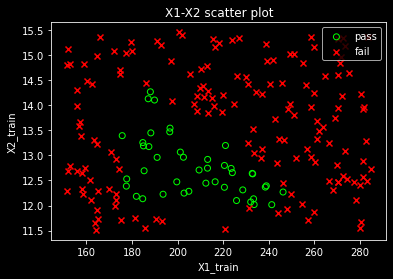

In [64]:
X_train, Y_train = read_data('./data/coffee_roasting_data.txt', feature_count=2)
plot_binary_classification_data(X_train, Y_train)

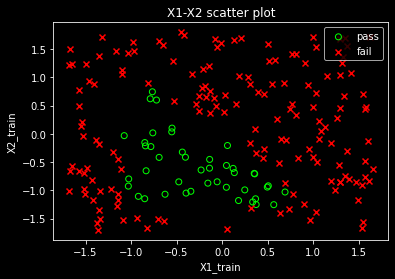

In [65]:
# Normalize data
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
X_normalized = norm_l(X_train)

plot_binary_classification_data(X_normalized, Y_train)

In [66]:
# Model
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(units=3, activation='sigmoid', name = 'layer1'),
        Dense(units=1, activation='sigmoid', name = 'layer2')
        ## Alternative way to specify input shape as part of first hidden layer
        #Dense(input_shape=(2,), units=3, activation='sigmoid', name = 'layer1'),
        #Dense(units=1, activation='sigmoid', name = 'layer2')
     ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Check initial parameters TensorFlow has assigned the model
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.08334005 -0.29660565  0.17884266]
 [-0.56124383 -0.15262699  0.8899205 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.4277674 ]
 [-0.88499916]
 [ 0.3626454 ]] 
b2(1,): [0.]


In [68]:
#Tile/copy data to increase the training set size and reduce the number of training epochs.
#TODO: Does this change time required for training when compared with more epochs and original data size?

X_tiled = np.tile(X_normalized,(1000,1))
Y_train = Y_train.reshape(-1,1)
Y_tiled= np.tile(Y_train,(1000,1))   
print(X_tiled.shape, Y_tiled.shape)  


# Compile model and fit data
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    X_tiled,Y_tiled,            
    epochs=10,
)
# Default batch size is 32 .. hence 6250 in the output log (20,000 / 32)

(200000, 2) (200000, 1)
Epoch 1/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.1782
Epoch 2/10
6250/6250 [==============================] - 6s 924us/step - loss: 0.1165
Epoch 3/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0426
Epoch 4/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0160
Epoch 5/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0104
Epoch 6/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0073
Epoch 7/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0052
Epoch 8/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0037
Epoch 9/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0027
Epoch 10/10
6250/6250 [==============================] - 5s 879us/step - loss: 0.0020


In [69]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ -0.12673546  14.295975   -11.096158  ]
 [ -8.916381    11.853628    -0.25223935]] 
b1: [-11.162895    1.7599365 -12.097788 ]
W2:
 [[-45.710316]
 [-42.945248]
 [-50.18991 ]] 
b2: [26.144835]


In [70]:
## We can set pre-obtained weights and biases using the following

#W1 = np.array([
#    [-8.94,  0.29, 12.89],
#    [-0.17, -7.34, 10.79]] )
#b1 = np.array([-9.87, -9.28,  1.01])
#W2 = np.array([
#    [-31.38],
#    [-27.86],
#    [-32.79]])
#b2 = np.array([15.54])
#model.get_layer("layer1").set_weights([W1,b1])
#model.get_layer("layer2").set_weights([W2,b2])

In [71]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)
# Threshold the predictions
Y_hat = np.where(predictions >=0.5, 1, 0)
print("Thresholded predictions = \n", Y_hat)

1/1 [==============================] - 0s 26ms/step
predictions = 
 [[9.890383e-01]
 [4.942275e-08]]
Thresholded predictions = 
 [[1]
 [0]]


7/7 [==============================] - 0s 8ms/step


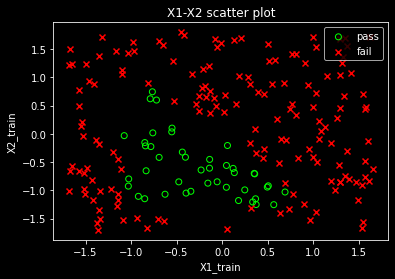

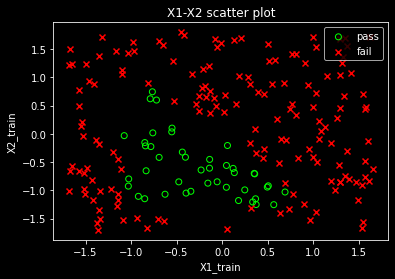

In [72]:
# Plot predicted outputs

Y_hat = model.predict(X_normalized)

# Threshold the predictions
Y_hat = np.where(Y_hat >=0.5, 1, 0)

# Reshape to fit my sketchy plot function
Y_hat = Y_hat.reshape(Y_hat.shape[0])
Y_train = Y_train.reshape(Y_train.shape[0])

#Plot the predicted values and the ground truth
plot_binary_classification_data(X_normalized, Y_hat)
plot_binary_classification_data(X_normalized, Y_train)

50/50 [==============================] - 0s 1ms/step
(200,) (200,) (1600,)


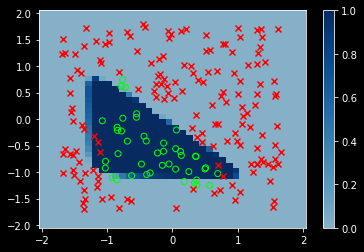

In [73]:
# Plot probabilities predicted by the NN
#-----------------------------------------

from matplotlib import cm
import matplotlib.colors as colors


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

x0  = np.linspace(-2, 2, 40)
x1  = np.linspace(-2, 2, 40)

X_meshed = np.array(np.meshgrid(x0, x1)).T.reshape(-1, 2)
x0, x1 = np.meshgrid(x0, x1)
pred = model.predict(X_meshed)
Y_hat_grid = np.where(pred >=0.5, 1, 0)
pred = pred.reshape(x0.shape)

cmap = plt.get_cmap('Blues')
cmap = truncate_colormap(cmap, 0.4)

pcm = plt.pcolormesh(x0, x1, pred, cmap=cmap, norm=cm.colors.Normalize(vmin=0, vmax=1), alpha = 0.9, shading='nearest')
cbar = plt.colorbar()

X1_train = X_normalized[:,0] # First feature data
X2_train = X_normalized[:,1] # Second feature data


Y_hat_grid = Y_hat_grid.reshape(Y_hat_grid.shape[0])

Y_train = Y_hat
print(X1_train.shape, X2_train.shape, Y_hat_grid.shape)

plt.scatter(X1_train[Y_train==1], X2_train[Y_train==1], marker = 'o', edgecolors='lime', facecolors='none')
plt.scatter(X1_train[Y_train==0], X2_train[Y_train==0], marker = 'x', c='r')
plt.show()


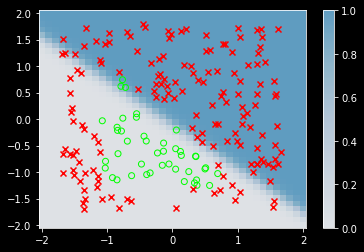

In [75]:
# Plot probabilities predicted by each neuron of the first layer
#---------------------------------------------------------------

n = 1 # Neuron index we want to see probability output for

pred = np.zeros((X_meshed.shape[0], 1))


for i in range(X_meshed.shape[0]):
    a_out = sigmoid(np.matmul(W1.T, X_meshed[i,:]) + b1)
    a_out = a_out.reshape(-1,1)
    pred[i] = a_out[n]

pred = pred.reshape(x0.shape)

cmap = plt.get_cmap('Blues')
cmap = truncate_colormap(cmap, 0.0, 0.5)


pcm = plt.pcolormesh(x0, x1, pred, cmap=cmap, norm=cm.colors.Normalize(vmin=0, vmax=1), alpha = 0.9, shading='nearest')
cbar = plt.colorbar()

X1_train = X_normalized[:,0] # First feature data
X2_train = X_normalized[:,1] # Second feature data


Y_train = Y_hat

plt.scatter(X1_train[Y_train==1], X2_train[Y_train==1], marker = 'o', edgecolors='lime', facecolors='none')
plt.scatter(X1_train[Y_train==0], X2_train[Y_train==0], marker = 'x', c='r')

plt.show()
